In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [14]:
df_feat = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])

In [15]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [16]:
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
df_target = pd.DataFrame(cancer['target'], columns = ['Cancer'])

In [18]:
df_target.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(df_feat)

StandardScaler()

In [24]:
scaled_features = scaler.transform(df_feat)

In [27]:
df_scaled_features = pd.DataFrame(scaled_features, columns=df_feat.columns)

In [28]:
df_scaled_features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, np.ravel(df_target), test_size=0.30, random_state=105)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neightbors = 1)

In [34]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [35]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [36]:
pred = knn.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
confusion_matrix(y_test, pred)

array([[ 55,   4],
       [  5, 107]])

In [39]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.93      0.92        59\n           1       0.96      0.96      0.96       112\n\n    accuracy                           0.95       171\n   macro avg       0.94      0.94      0.94       171\nweighted avg       0.95      0.95      0.95       171\n'

In [40]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [41]:
error_rate

[0.05263157894736842,
 0.07017543859649122,
 0.04093567251461988,
 0.04093567251461988,
 0.029239766081871343,
 0.03508771929824561,
 0.029239766081871343,
 0.029239766081871343,
 0.023391812865497075,
 0.029239766081871343,
 0.023391812865497075,
 0.023391812865497075,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.011695906432748537,
 0.017543859649122806,
 0.023391812865497075,
 0.023391812865497075,
 0.023391812865497075,
 0.023391812865497075,
 0.017543859649122806,
 0.017543859649122806,
 0.023391812865497075,
 0.029239766081871343,
 0.023391812865497075,
 0.023391812865497075,
 0.023391812865497075,
 0.023391812865497075,
 0.029239766081871343,
 0.023391812865497075,
 0.023391812865497075,
 0.023391812865497075,
 0.023391812865497075]

Text(0, 0.5, 'Error Rate')

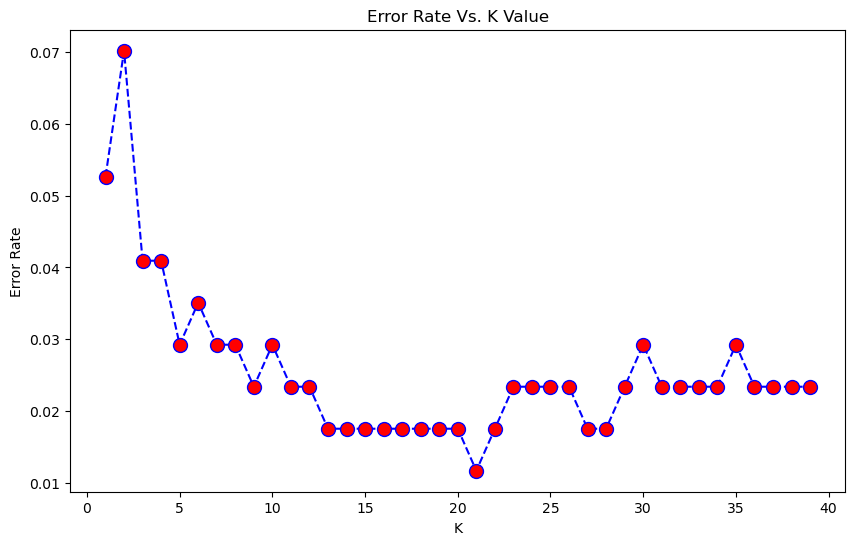

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle=
        'dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate Vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [43]:
knn = KNeighborsClassifier(n_neighbors = 21)

In [ ]:
knn.fit(X_train, y_train)